# JHU covid-19 daily data processing 

Test and update functions for JHU data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import glob
import os
 
import matplotlib.ticker as mticker
import matplotlib.dates as mdates 

from datetime import timedelta 
import datetime
import pytz
from tzwhere import tzwhere 
import JHUprocessing as jp


from matplotlib.dates import date2num       #-->Update

import matplotlib
from matplotlib import cm


In [2]:
# Load daily reports 

In [3]:
path = r'D:\Code_projects\Covid19_analysis\COVID-19\csse_covid_19_data\csse_covid_19_daily_reports'

daily_reports = glob.glob(path + '\*.csv') 
df = pd.DataFrame()
for file in daily_reports :
    df_temp = pd.read_csv( file, index_col=None, header=0)
#     print(file) 
    df = df.append(df_temp, sort=True) 

df.tail()

,Active,Admin2,Combined_Key,Confirmed,Country/Region,Country_Region,Deaths,FIPS,Last Update,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
3429,78.0,NaN,Venezuela,119.0,NaN,Venezuela,2.0,NaN,NaN,2020-03-29 23:08:13,6.423800,NaN,-66.589700,NaN,NaN,NaN,39.0
3430,163.0,NaN,Vietnam,188.0,NaN,Vietnam,0.0,NaN,NaN,2020-03-29 23:08:13,14.058324,NaN,108.277199,NaN,NaN,NaN,25.0
3431,90.0,NaN,West Bank and Gaza,109.0,NaN,West Bank and Gaza,1.0,NaN,NaN,2020-03-29 23:08:13,31.952200,NaN,35.233200,NaN,NaN,NaN,18.0
3432,29.0,NaN,Zambia,29.0,NaN,Zambia,0.0,NaN,NaN,2020-03-29 23:08:13,-13.133897,NaN,27.849332,NaN,NaN,NaN,0.0
3433,6.0,NaN,Zimbabwe,7.0,NaN,Zimbabwe,1.0,NaN,NaN,2020-03-29 23:08:13,-19.015438,NaN,29.154857,NaN,NaN,NaN,0.0


In [4]:
# adjust column names and use only relevant columns

In [5]:
# convert different datetimes to same datetime column 
df['Last Update'] = pd.to_datetime(df['Last Update']   )
df['Last_Update'] = pd.to_datetime(df['Last_Update']   )   #  
cond = df['Last_Update'].isnull()
df['Last Update'] = df['Last Update'].where(cond, df['Last_Update'] ) 
df['Datetime']= pd.to_datetime(df['Last Update'] , unit='D'   ) 
df['Date'] = df['Datetime'].dt.date


cond = df['Country_Region'].isnull()
df['Country/Region'] = df['Country/Region'].where(cond, df['Country_Region'] ) 


cond = df['Province_State'].isnull()
df['Province/State'] = df['Province/State'].where(cond, df['Province_State'] ) 
 
col_order = ['Date','Country/Region','Province/State','Active','Confirmed','Deaths','Recovered','Combined_Key' ]
df = df[col_order]

df.tail()

,Date,Country/Region,Province/State,Active,Confirmed,Deaths,Recovered,Combined_Key
3429,2020-03-29,Venezuela,NaN,78.0,119.0,2.0,39.0,Venezuela
3430,2020-03-29,Vietnam,NaN,163.0,188.0,0.0,25.0,Vietnam
3431,2020-03-29,West Bank and Gaza,NaN,90.0,109.0,1.0,18.0,West Bank and Gaza
3432,2020-03-29,Zambia,NaN,29.0,29.0,0.0,0.0,Zambia
3433,2020-03-29,Zimbabwe,NaN,6.0,7.0,1.0,0.0,Zimbabwe


In [16]:
# process columns 
 

In [6]:
bool_US = df['Country/Region'] =='US' 
# bool_last = df['Date'] > datetime.datetime(2020,3,22).date() 
bool_last = df['Date'] == df['Date'].max()
 
df_US = df[bool_US & bool_last ].copy() 
 
df_US =  df_US.groupby(['Province/State','Date']).sum().reset_index()  
df_US = df_US.sort_values( by=['Province/State','Date']).reset_index(drop=True)  
 
df_US.head()
 

,Province/State,Date,Active,Confirmed,Deaths,Recovered
0,Alabama,2020-03-29,0.0,825.0,10.0,0.0
1,Alaska,2020-03-29,0.0,102.0,2.0,0.0
2,American Samoa,2020-03-29,0.0,0.0,0.0,0.0
3,Arizona,2020-03-29,0.0,919.0,17.0,0.0
4,Arkansas,2020-03-29,0.0,426.0,6.0,0.0


In [ ]:
# transform state geom? 

In [10]:
# function to move and scale a state
def transform_state( geom, data_frame, trans_x, trans_y, scaling_factor, face_color):
        dataFrame_out = data_frame.copy() 
        geoTrans = shp.translate( geom, trans_x, trans_y)  
        centroid = geoTrans.centroid.coords[0]
        geoTransScale = shp.scale( geoTrans, xfact=scaling_factor, yfact=scaling_factor, origin=centroid)
        ax.add_geometries( geoTransScale, ccrs.PlateCarree(), facecolor=face_color, edgecolor='k')   
        
        dataFrame_out.loc[:,'lon'] = ((data_frame.loc[:,'lon']  - trans_x + centroid[0] )*
                                        scaling_factor  - centroid[0]  )
        dataFrame_out.loc[:,'lat'] = ((data_frame.loc[:,'lat']  + trans_y - centroid[1] )*
                                        scaling_factor  + centroid[1]  ) 
        return dataFrame_out

NameError: name 'US' is not defined

D:\D_program_files\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\D_program_files\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


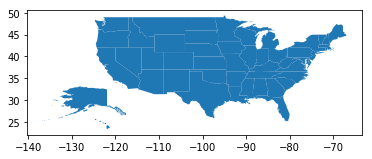

In [125]:
import geopandas as gpd
     
    
     
US = gpd.read_file( 'geo_data\states.shp')
AKratio = 0.4;  # scales Alaska 
HIratio = 0.7 # scales Hawai 
AKtrans = [26,-34] # moves Alaska south and east 
HItrans = [34,4] # moves Hawaii east and north 
 
import shapely.affinity as shp

# get original polygons
bool_alaska = US['STATE_NAME'] == 'Alaska'
alaska_geom = US.loc[bool_alaska,'geometry'].iloc[0] 

alaska_moved = shp.translate(alaska_geom, AKtrans[0], AKtrans[1])  
centroid = alaska_moved.centroid
alaska_scaled = shp.scale( alaska_moved, xfact=AKratio, yfact=AKratio, origin=centroid)
US['geometry'][50] =  alaska_scaled

bool_hawaii = US['STATE_NAME'] == 'Hawaii'
hawaii_geom = US.loc[bool_hawaii,'geometry'].iloc[0] 

hawaii_moved = shp.translate(hawaii_geom, HItrans[0], HItrans[1])  
centroid = hawaii_moved.centroid
hawaii_scaled = shp.scale( hawaii_moved, xfact=HIratio, yfact=HIratio, origin=centroid)
US['geometry'][0] =  hawaii_scaled

  
 
US.plot();

df_US = df_US.rename(columns={'Province/State':'STATE_NAME'}) 
US= pd.merge(US, df_US, how='left', on=['STATE_NAME'])
 
US['Cases'] = np.log( US ['Confirmed']+1) 
# US.head()

In [ ]:
# plot US map

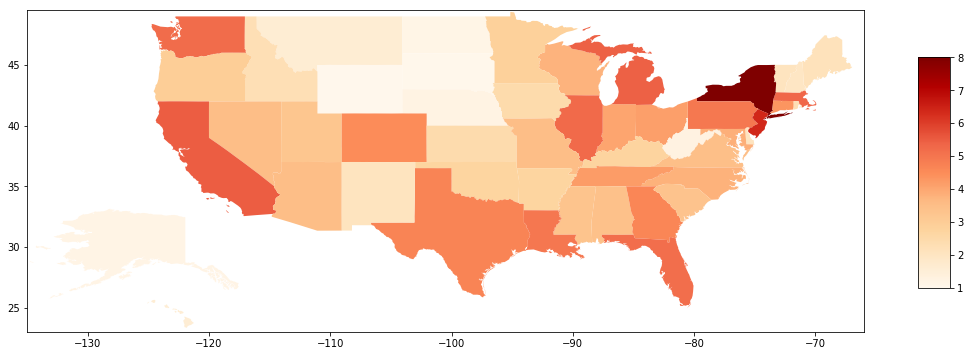

In [142]:
fig, ax = plt.subplots(1,1 ,figsize=(15,8))




wp = US.plot(column='Cases', ax=ax, cmap='OrRd'   );
 
vmin = 1
vmax = 8 

cax = fig.add_axes([0.95, 0.3, 0.03, 0.4])
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)

 

wp.set_xbound(-135,-66)
wp.set_ybound(23,49.5)  

# # # # # save fig  -----------------------------------------------------------------------
fig_name= 'covid_state_map'
save_fig = True
if save_fig: 
    plt.savefig('./figs/' + fig_name + '.png',
            format='png', dpi=300,
            transparent=  True,             
            bbox_inches = 'tight', pad_inches = 0,
            )   